## Problem 1: Create a polygon from a list of coordinates (5 points)

In the first problem, **the aim is to create a polygon based on the provided coordinates, and to plot the polygon in a map.** 

Two lists, `longitudes` and `latitudes`, contain the input coordinates for the polygon. You need to ‘assemble’ the coordinates to individual tuples of one longitude and one latitude coordinate each (The first coordinate pair looks like this: `(29.99671173095703, 63.748023986816406)`).

In [5]:
# Longitudes in decimal degrees
longitudes = [29.99671173095703, 31.58196258544922, 27.738052368164062, 26.50013542175293, 26.652359008789062, 25.921663284301758, 22.90027618408203, 23.257217407226562,
           23.335693359375, 22.87444305419922, 23.08465003967285, 22.565473556518555, 21.452774047851562, 21.66388702392578, 21.065969467163086, 21.67659568786621,
           21.496871948242188, 22.339998245239258, 22.288192749023438, 24.539581298828125, 25.444232940673828, 25.303749084472656, 24.669166564941406, 24.689163208007812,
           24.174999237060547, 23.68471908569336, 24.000761032104492, 23.57332992553711, 23.76513671875, 23.430830001831055, 23.6597900390625, 20.580928802490234, 21.320831298828125,
           22.398330688476562, 23.97638702392578, 24.934917449951172, 25.7611083984375, 25.95930290222168, 26.476804733276367, 27.91069221496582, 29.1027774810791, 29.29846954345703,
           28.4355525970459, 28.817358016967773, 28.459857940673828, 30.028610229492188, 29.075136184692383, 30.13492774963379, 29.818885803222656, 29.640830993652344, 30.57735824584961,
           29.99671173095703]

# Latitudes in decimal degrees
latitudes = [63.748023986816406, 62.90789794921875, 60.511383056640625, 60.44499588012695, 60.646385192871094, 60.243743896484375, 59.806800842285156, 59.91944122314453,
           60.02395248413086, 60.14555358886719, 60.3452033996582, 60.211936950683594, 60.56249237060547, 61.54027557373047, 62.59798049926758, 63.02013397216797,
           63.20353698730469, 63.27652359008789, 63.525691986083984, 64.79915618896484, 64.9533920288086, 65.51513671875, 65.65470886230469, 65.89610290527344, 65.79151916503906,
           66.26332092285156, 66.80228424072266, 67.1570053100586, 67.4168701171875, 67.47978210449219, 67.94589233398438, 69.060302734375, 69.32611083984375, 68.71110534667969,
           68.83248901367188, 68.580810546875, 68.98916625976562, 69.68568420410156, 69.9363784790039, 70.08860778808594, 69.70597076416016, 69.48533630371094, 68.90263366699219,
           68.84700012207031, 68.53485107421875, 67.69471740722656, 66.90360260009766, 65.70887756347656, 65.6533203125, 64.92096710205078, 64.22373962402344, 63.748023986816406]

### a) Create a `shapely.geometry.Polygon` geometry `polygon` based on the coordinates

- Create a list of coordinate pairs based on the provided longitudes and latitudes and store the list in a variable `coordinate_pairs`. A coordinate pair can be either a tuple or a list.
- Create a `shapely.geometry.Polygon` using the `coordinate_pairs`. Store the polygon in a variable `polygon`.

In [6]:
# ADD YOUR OWN CODE HERE
from shapely.geometry import Polygon
coordinate_pairs = [(x, y) for x, y in zip(latitudes, longitudes)]
polygon = Polygon(coordinate_pairs)

In [7]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Check the first coordinate pair. Shoud be: (29.99671173095703, 63.748023986816406)
print(coordinate_pairs[0])

(63.748023986816406, 29.99671173095703)


In [8]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Check the data type of your polygon:
print(polygon.geom_type)

Polygon


### b) Insert the polygon into a newly created `geopandas.GeoDataFrame` called `geo`

(see the hints for this exercise for more different approaches to complete this task)

Be sure to define a coordinate reference system for the data (the coordinates are in WGS84 format)

In [9]:
# ADD YOUR OWN CODE HERE
import geopandas
d = {'name': ['polygon'], 'geometry': [polygon]}
geo = geopandas.GeoDataFrame(d, crs="EPSG:4326")
geo

,name,geometry
0,polygon,"POLYGON ((63.74802 29.99671, 62.90790 31.58196..."


In [10]:
geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Check the content of the GeoDataFrame:
print(geo.head())

      name                                           geometry
0  polygon  POLYGON ((63.74802 29.99671, 62.90790 31.58196...


In [12]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Check the number of rows:
print(len(geo))

1


### c) Plot the data set

Which shape do you see? *Add a comment to the pull request to answer!*

<Figure size 640x480 with 0 Axes>

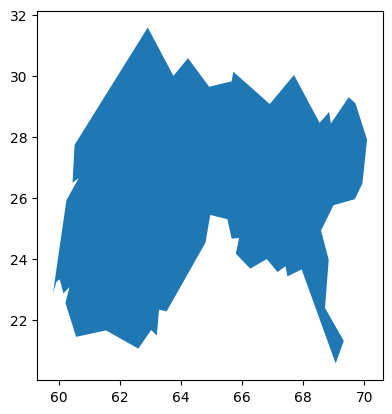

In [13]:
# ADD YOUR OWN CODE HERE
%matplotlib inline
import matplotlib.pyplot as plt
plt.tight_layout()
fig, ax = plt.subplots()
geo.plot(ax=ax)
ax.set_aspect(1)
plt.show()

### d) Save the `GeoDataFrame` to a file

Save the file in GeoPackage format, save it inside the `data` directory, and name it `mysterious-polygon.gpkg`.

In [16]:
import pathlib 
NOTEBOOK_PATH = pathlib.Path().resolve()
DATA_DIRECTORY = NOTEBOOK_PATH / "data"

In [19]:
# ADD YOUR OWN CODE HERE
geo.to_file(DATA_DIRECTORY / "mysterious-polygon.gpkg")

In [20]:
# NON-EDITABLE CODE CELL FOR TESTING YOUR SOLUTION

# Check if output file exists
import pathlib
DATA_DIRECTORY = pathlib.Path().resolve() / "data"
assert (DATA_DIRECTORY / "mysterious-polygon.gpkg").exists()



---

### Well done!

You can continue with [Exercise-2 Problem 2](Exercise-2-problem-2.ipynb)